In [44]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from scipy import stats
import sys

In [2]:
direc = r"./dataFolders/Output/Proboscis/FilteredTracks/"
visitnum = ['FirstVisit/', 'LastVisit/']

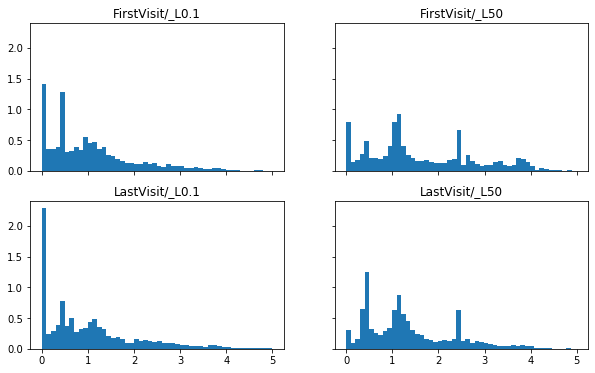

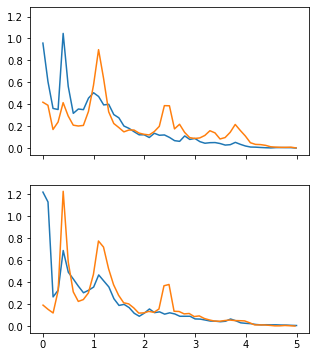

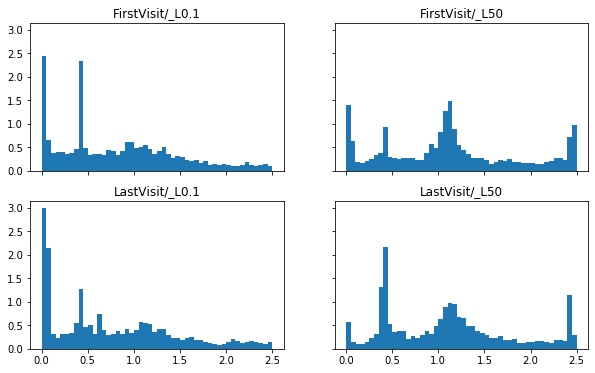

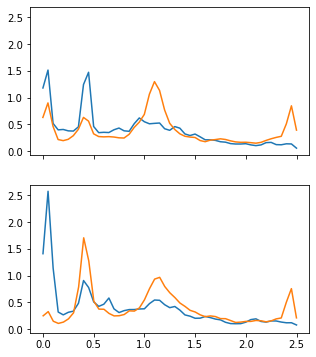

In [82]:
f, ax = plt.subplots(2,2, figsize = (10,6), sharex = True, sharey = True)
ax = ax.ravel()

f1, ax1 = plt.subplots(2,1, figsize = (5,6), sharex = True, sharey = True)
ax1 = ax1.ravel()

f0, ax0 = plt.subplots(2,2, figsize = (10,6), sharex = True, sharey = True)
ax0 = ax0.ravel()

f01, ax01 = plt.subplots(2,1, figsize = (5,6), sharex = True, sharey = True)
ax01 = ax01.ravel()


i = 0
j = 0
for visit in visitnum:
    datalist = glob.glob(direc + visit + '*.csv')   
    for light in ['L0.1', 'L50']:
        subset = [l for l in datalist if light in l]
        df = pd.DataFrame()
        for dd in subset:
            ff = pd.read_csv(dd)
            df = df.append(ff)
        
        for limit, axes, pde_axes in zip([5, 2.5], [ax, ax0], [ax1, ax01]):
            r = df.loc[df.r < limit, 'r']
            kernel = stats.gaussian_kde(r)
            kernel.set_bandwidth(kernel.factor/3)
        
            _, positions, _ = axes[i].hist(r, bins = 50, density = True)
            pde = kernel(positions)
            pde_axes[j].plot(positions, pde)
            axes[i].set_title(visit + '_' + light)
        i+=1
    j=+1
    
f.savefig('./dataFolders/Output/Proboscis/Plots/RadialPosition_histogram.png')
f1.savefig('./dataFolders/Output/Proboscis/Plots/RadialPosition_PDE_histogram.png')
f0.savefig('./dataFolders/Output/Proboscis/Plots/RadialPosition_histogram_zoomedIN.png')
f01.savefig(('./dataFolders/Output/Proboscis/Plots/RadialPosition_PDE_histogram_zoomedIN.png'))

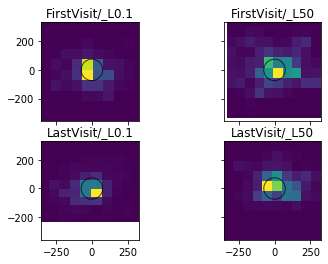

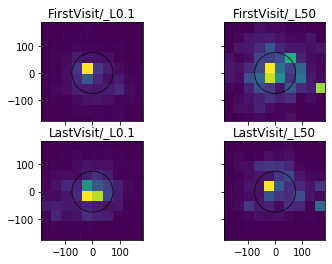

In [40]:
f, ax = plt.subplots(2,2, sharex = True, sharey = True)
ax = ax.ravel()

f0, ax0 = plt.subplots(2,2, sharex = True, sharey = True)
ax0 = ax0.ravel()


i = 0
for visit in visitnum:
    datalist = glob.glob(direc + visit + '*.csv')
    
    for light in ['L0.1', 'L50']:
        subset = [l for l in datalist if light in l]
        df = pd.DataFrame()
        for dd in subset:
            ff = pd.read_csv(dd)
            df = df.append(ff)
            
        x = df.loc[df.r < 5, 'x_centered']
        y = df.loc[df.r < 5, 'y_centered']
        ax[i].hist2d(x,y)
        c1 = plt.Circle((0, 0), 75, 
                        facecolor='none', alpha = 0.7,
                    edgecolor= 'black', linewidth = 1)
        ax[i].add_artist(c1)
        ax[i].set_aspect('equal')
        ax[i].set_title(visit + '_' + light)
        
        x = df.loc[df.r < 2.5, 'x_centered']
        y = df.loc[df.r < 2.5, 'y_centered']
        ax0[i].hist2d(x,y)
        c1 = plt.Circle((0, 0), 75, 
                        facecolor='none', alpha = 0.7,
                    edgecolor= 'black', linewidth = 1)
        ax0[i].add_artist(c1)
        ax0[i].set_aspect('equal')
        ax0[i].set_title(visit + '_' + light)
        i+=1